In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt 
#from IPython.display import display, clear_output

## Define the Finite Difference Differentiation Method 

In [8]:
def finite_diff(f, x, type="forward", error=0.01, static=True):
    """
    Goal: Calculate the derivative of a function at a range of x values using a specified finite difference method

    Inputs:
        f       -- fuction given as a lambda
        x       -- a range of x values (domain) on which the function f is defined 
        type    -- indicates the type of finite difference (forward, backward, central)  
        error   -- represents the desired level of accuracy when determing stepsize 
        static  -- whether to use static or adaptive step methods
    
    Output:
        D       -- approximation of the derivative of f
        X       -- the x values at which the derivative was evaluated
    """

 
    if (type == "backward"):
        g = lambda x, h:    (f(x) - f(x-h))/h
    elif (type == "central"):
        g = lambda x, h:    (f(x+h) - f(x-h))/(2*h)
    elif (type == "forward"):
        g = lambda x, h:    (f(x+h) - f(x))/h  
    else:
        print("Not defined the type of finite difference!")
        return


    
    
    D = []
    X = []
    x_ = x[0]
    if(not static):
        #Adaptive Step Size Method
        x_ = x[0]
        while x_ < x[-1]:
                
            h1 = error
            h2 = error/2

            dx1 = g(x_, h1)
            dx2 = g(x_, h2)
            
            while(abs(dx1 - dx2)>= error):
                h1 = h2
                h2 = h2/2

                dx1 = g(x_, h1)
                dx2 = g(x_, h2)
            
            D.append(dx2)
            X.append(x_)
            x_ = x_ + h2
    else:
        #Static Step Size Method
        #Define the stap statically using the error specified
        h = 2*np.sqrt(error)
        #h = (x[-1] - x[0])/len(x)
        for x_ in x:
            dx = g(x_, h)
            D.append(dx)
            X.append(x_)
    
    return D, X


### Define the function for which you want to approximate the derivative 

In [5]:
x = sym.Symbol('x')

f_ = sym.exp(-0.1*x)*sym.cos(x)
#f_ = sym.log(x)
#f_ = x**4 - 2*x**2



In [6]:
df_ = sym.diff(f_)
f = sym.lambdify(x, f_)
df = sym.lambdify(x, df_)

error = 0.5
x_min = 0
x_max = 10

x_vals = np.linspace(x_min, x_max, 500)

## Use the finite difference method with both adaptive and static steps

In [9]:
D_adaptive, X_ad = finite_diff(f, x_vals,"central", error, False)
D_static, X_stat = finite_diff(f, x_vals, "central", error, True)

## Plot live with pauses 

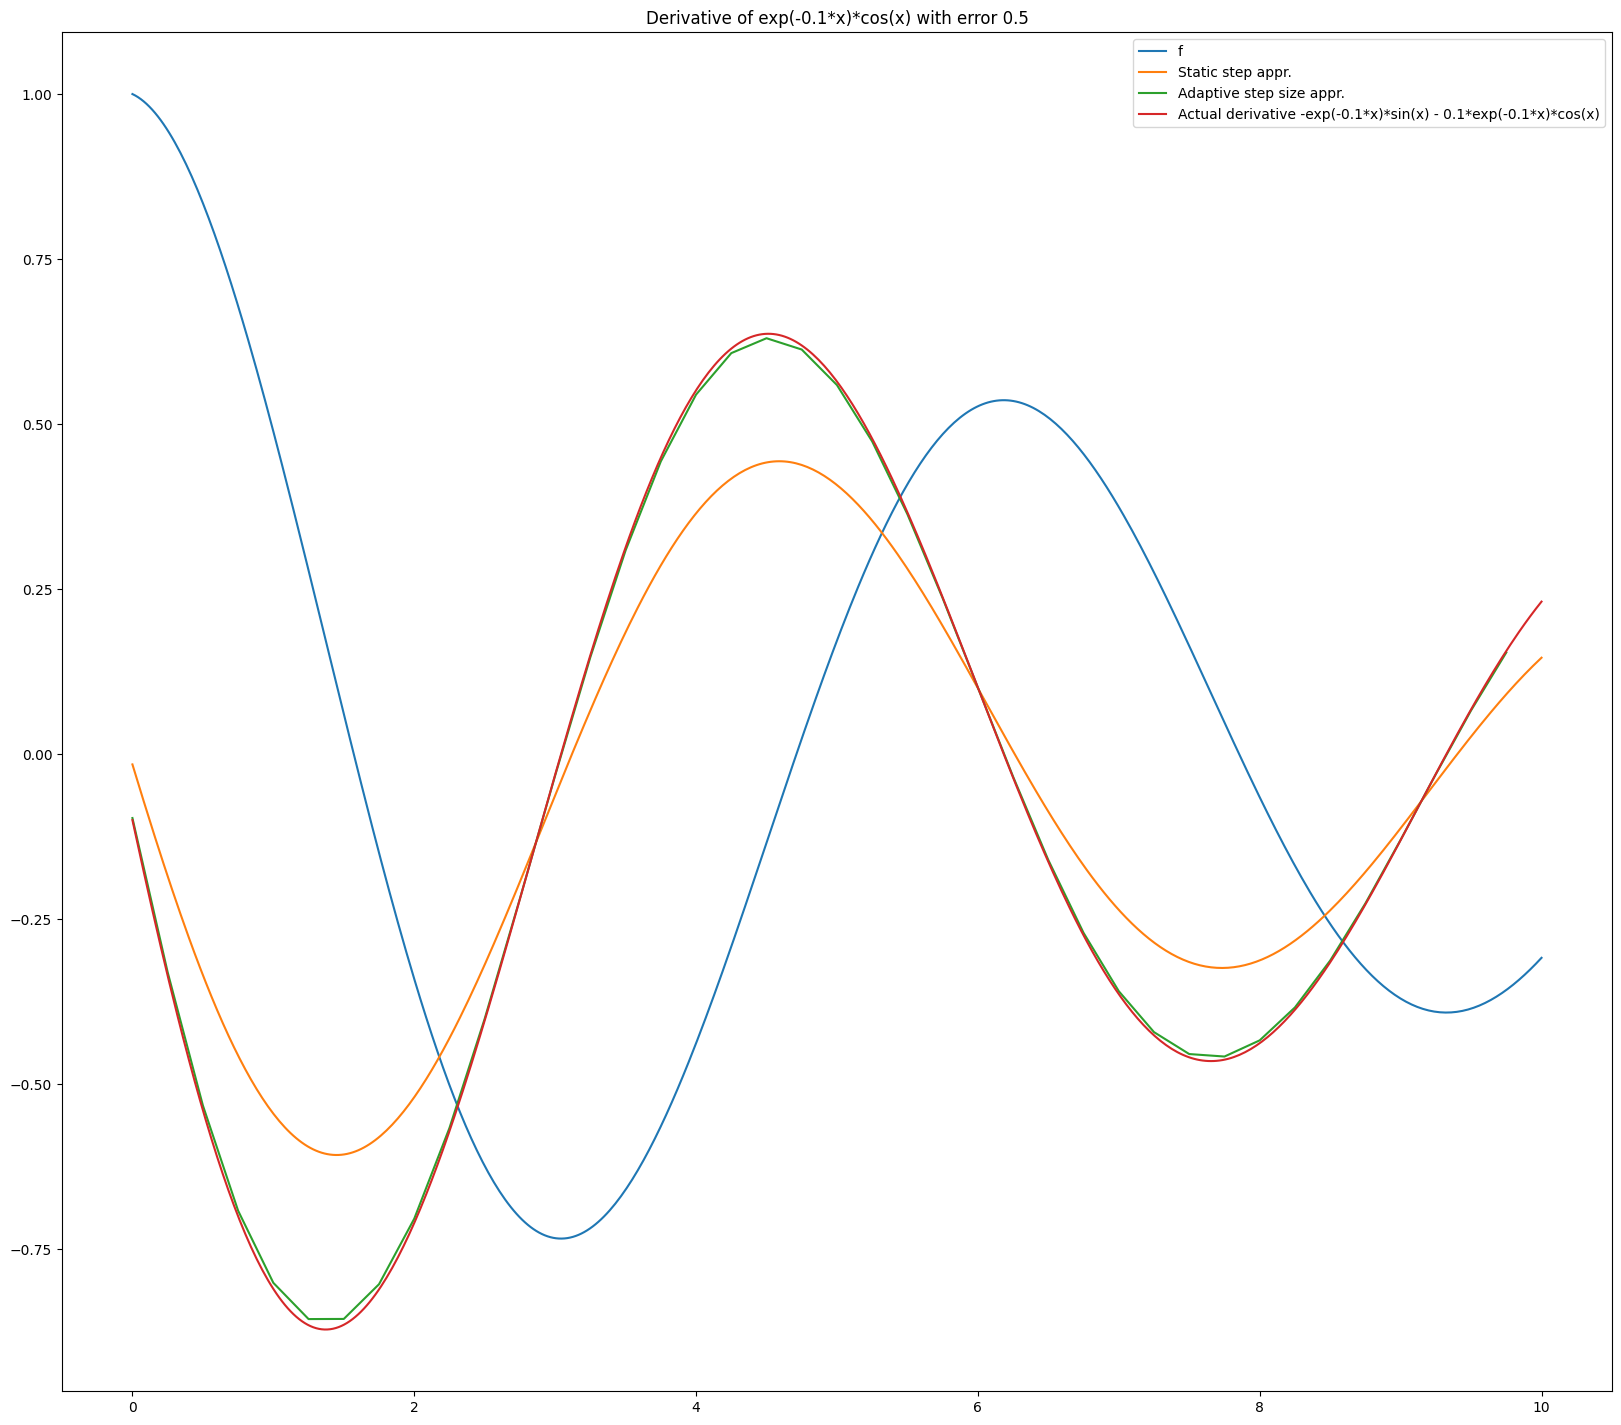

In [10]:
plt.rc('grid', linestyle=':', color='black', linewidth=2)
plt.figure(figsize=(20,18), dpi=100)
plt.title(f"Derivative of {f_} with error {error}")
timeDelay = 0.75

plt.plot(x_vals, f(x_vals), label=f'f')
#plt.pause(timeDelay)

plt.plot(X_stat, D_static, label='Static step appr.')
#plt.pause(timeDelay)

plt.plot(X_ad, D_adaptive, label='Adaptive step size appr.')
#plt.pause(timeDelay)

plt.plot(x_vals, df(x_vals), label=f'Actual derivative {df_}')
#plt.pause(timeDelay)

# plt.plot()
plt.legend()
plt.show()